In [2]:
## Importing my modules here.

import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly
import plotly.graph_objs as go
import scipy as sp
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='KidKrinkles', api_key='MRQLDczG8KslPVEIXg29')


## Just to show what versions I'm running of the modules.
print(plotly.__version__)
print(np.__version__)
print(sp.__version__)

3.4.2
1.14.3
1.1.0


In [3]:
## Bring in the file in question. Sets it as "schooldata".

with open("datasets/userssharedsdfschoolimprovement2010grants.csv", "r") as f:
        schooldata = pd.read_csv(f)

In [4]:
#Set up the columns and rows (apparently there's also no row height option to my knowledge? Maybe there's text spacing?)

pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows',1000)

In [5]:
## Confirm it even reads.

schooldata.head()

,School Name,City,State,District Name,2010/11/Award Amount,Model Selected,Location
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,$471014.00,Transformation,"200 MAIN ST\nSAVOONGA, AK 99769\n(63.6687, -170.603)"
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,$520579.00,Transformation,"AKIACHAK 51100\nAKIACHAK, AK 99551\n(60.8911, -161.376)"
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,$449592.00,Transformation,"169 MAIN ST\nGAMBELL, AK 99742\n(63.7413, -171.689)"
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$641184.00,Transformation,"1775 WEST PARKS HWY\nWASILLA, AK 99654\n(61.5794, -149.495)"
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,$399686.00,Transformation,"AKIAK 5227\nAKIAK, AK 99552\n(60.8879, -161.2)"


In [6]:
## Confirm it reads the whole file.

schooldata.tail()

,School Name,City,State,District Name,2010/11/Award Amount,Model Selected,Location
826,MOUNT HOPE HIGH SCHOOL,MOUNT HOPE,WV,FAYETTE COUNTY SCHOOLS,$342189.00,Transformation,"110 HIGH SCHOOL DR\nMOUNT HOPE, WV 25880\n(37.8981, -81.1571)"
827,GEARY ELEMENTARY SCHOOL,LEFT HAND,WV,ROANE COUNTY SCHOOLS,$260000.00,Transformation,"9538 CLAY RD\nLEFT HAND, WV 25251\n(38.6188, -81.2463)"
828,TRIUMPH HIGH SCHOOL,CHEYENNE,WY,LARAMIE COUNTY SCHOOL DISTRICT #1,$297300.00,Transformation,"2201 MORRIE AVE\nCHEYENNE, WY 82001\n(41.1423, -104.808)"
829,HEM JUNIOR/SENIOR HIGH SCHOOL,HANNA,WY,CARBON COUNTY SCHOOL DISTRICT #2,$274000.00,Transformation,"US HWY 72\nHANNA, WY 82327\n(41.8723, -106.548)"
830,ROOSEVELT HIGH SCHOOL,CASPER,WY,NATRONA COUNTY SCHOOL DISTRICT #1,$431382.00,Transformation,"140 EAST K ST\nCASPER, WY 82601\n(42.861, -106.324)"


In [7]:
## Confirming the column names as shown above.

schooldata.columns

## We want to rename these probably for ease of legibility.

Index(['School Name', 'City', 'State', 'District Name', '2010/11/Award Amount', 'Model Selected', 'Location'], dtype='object')

In [8]:
schooldata.columns=['School', 'City', 'State', 'District', '($)Award', 'Model', 'Address']
schooldata.columns

Index(['School', 'City', 'State', 'District', '($)Award', 'Model', 'Address'], dtype='object')

In [9]:
## Great, that works. Note I've added a dollar sign to the award column.

In [10]:
## Now to get rid of that annoying $ from the actual data.

schooldata = schooldata.astype(str)
schooldata['($)Award'] = schooldata['($)Award'].str.replace("$", "")
schooldata.head()

,School,City,State,District,($)Award,Model,Address
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,471014.00,Transformation,"200 MAIN ST\nSAVOONGA, AK 99769\n(63.6687, -170.603)"
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,520579.00,Transformation,"AKIACHAK 51100\nAKIACHAK, AK 99551\n(60.8911, -161.376)"
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,449592.00,Transformation,"169 MAIN ST\nGAMBELL, AK 99742\n(63.7413, -171.689)"
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,641184.00,Transformation,"1775 WEST PARKS HWY\nWASILLA, AK 99654\n(61.5794, -149.495)"
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,399686.00,Transformation,"AKIAK 5227\nAKIAK, AK 99552\n(60.8879, -161.2)"


In [11]:
## Just noticed the \n, the new line tab, in the address section. This is kind of why I like having a new head/tail every change. I'm fairly forgetful.

schooldata['Address'] = schooldata['Address'].str.replace("\n", "")

In [12]:
## Confirm our changes again.
schooldata.head()

,School,City,State,District,($)Award,Model,Address
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,471014.00,Transformation,"200 MAIN STSAVOONGA, AK 99769(63.6687, -170.603)"
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,520579.00,Transformation,"AKIACHAK 51100AKIACHAK, AK 99551(60.8911, -161.376)"
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,449592.00,Transformation,"169 MAIN STGAMBELL, AK 99742(63.7413, -171.689)"
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,641184.00,Transformation,"1775 WEST PARKS HWYWASILLA, AK 99654(61.5794, -149.495)"
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,399686.00,Transformation,"AKIAK 5227AKIAK, AK 99552(60.8879, -161.2)"


In [13]:
## Alright, now to make the dollar amount something we can do some stats with.

print(schooldata.dtypes)
print("\n")

schooldata['($)Award'] = schooldata['($)Award'].astype(float)
print(schooldata.dtypes)

School      object
City        object
State       object
District    object
($)Award    object
Model       object
Address     object
dtype: object


School       object
City         object
State        object
District     object
($)Award    float64
Model        object
Address      object
dtype: object


In [14]:
## Next we group it up-- preferably by the model chosen though we could group them up by state, school district, even bracket them by amount recieved if we wanted.
## I'm primarily interested in the model chosen though at this moment.

modelgroup=schooldata.loc[:,['Model','($)Award']]

modelgroup=modelgroup.sort_values(['($)Award'], ascending=[1])

print(modelgroup)

## Uh oh, there's a bunch with nan values-- some have models but not amounts which is interesting. We outta remove them though.
## Note 47 is the last row with a value.


              Model  ($)Award
643  Transformation       1.0
80       Turnaround       2.0
553  Transformation       2.0
538  Transformation       2.0
279  Transformation       2.0
48   Transformation       2.0
531      Turnaround       2.0
541  Transformation       2.0
528  Transformation       2.0
527  Transformation       2.0
545  Transformation       2.0
524  Transformation       2.0
95       Turnaround       2.0
53   Transformation       2.0
502  Transformation       2.0
521  Transformation       2.0
759  Transformation       2.0
503  Transformation       2.0
500  Transformation      11.0
658  Transformation      14.0
506  Transformation      15.0
499  Transformation      15.0
529  Transformation      18.0
278  Transformation      18.0
536  Transformation      18.0
523  Transformation      18.0
281  Transformation      18.0
115  Transformation      19.0
629  Transformation     112.0
436  Transformation     125.0
505      Turnaround     125.0
433  Transformation     175.0
438  Trans

In [15]:
## First lets take a count.
modelgroup.shape
## 831 is the amount of rows, cool.

(831, 2)

In [16]:
modelgroup = modelgroup[np.isfinite(modelgroup['($)Award'])]

In [17]:
## Resorting into alphabetical order, by award amount.

modelgroup=modelgroup.sort_values(['Model', '($)Award'], ascending=[1,1]) 

print(modelgroup)
modelgroup.shape

# So we went from 831 to 757 values, losing 74 null values, nice!

totalModels = 757

              Model  ($)Award
802         Closure    5000.0
803         Closure    5000.0
808         Closure    5000.0
811         Closure    5000.0
145         Closure   13729.0
149         Closure   31935.0
150         Closure   32491.0
428         Closure   46872.0
103         Closure   49045.0
766         Closure   50000.0
771         Closure   50000.0
133         Closure   50000.0
798         Closure   95320.0
615         Closure  208773.0
675         Closure  254323.0
632         Closure  300000.0
488         Restart   17529.0
347         Restart  102706.0
344         Restart  120707.0
107         Restart  174824.0
342         Restart  177759.0
299         Restart  179737.0
74          Restart  185886.0
52          Restart  188694.0
57          Restart  189201.0
119         Restart  189229.0
178         Restart  305325.0
606         Restart  319320.0
621         Restart  362773.0
768         Restart  400000.0
339         Restart  465091.0
171         Restart  517340.0
169       

In [18]:
## Looks like it's time to group them to me. We can group them by models and get the statistics associated with them through that.
## We'll do one group per cell.


## 16 Closures

closuregroup = modelgroup.groupby(['Model']).get_group('Closure')
closuregroup.shape

closModels = 16

In [19]:
## Total is $1,202,488.00

closTotal = closuregroup['($)Award'].sum()
print(closTotal)

1202488.0


In [20]:
## 33 Restarts

restartgroup = modelgroup.groupby(['Model']).get_group('Restart')
restartgroup.shape

restModels = 33

In [21]:
## Total is $16,612,610.00

restTotal = restartgroup['($)Award'].sum()
print(restTotal)

16612610.0


In [22]:
## 543 Transformations

transgroup = modelgroup.groupby(['Model']).get_group('Transformation')
transgroup.shape

transModels = 543

In [23]:
## Total is $235,725,022.00

transTotal = transgroup['($)Award'].sum()
print(transTotal)

235725022.0


In [24]:
## 165 Turnarounds

turngroup = modelgroup.groupby(['Model']).get_group('Turnaround')
turngroup.shape

turnModels = 165

In [25]:
## Total is $65,026,596.00

turnTotal = turngroup['($)Award'].sum()
print(turnTotal)

65026596.0


In [26]:
## We have enough data now to compare the models, at least by their totals, to each other model. 

totalFunding = (transTotal + turnTotal + restTotal + closTotal)

## the total funding allocated was $318,566,716.00

print("Percentage of Closure funding")
closPerc = (closTotal/totalFunding)*100
print(closPerc)
print("Percentage of Restart funding")
restPerc = (restTotal/totalFunding)*100
print(restPerc)
print("Percentage of Transformation funding")
transPerc = (transTotal/totalFunding)*100
print(transPerc)
print("Percentage of Turnaround funding")
turnPerc = (turnTotal/totalFunding)*100
print(turnPerc)

Percentage of Closure funding
0.3774681847177029
Percentage of Restart funding
5.214797769394088
Percentage of Transformation funding
73.99549612709697
Percentage of Turnaround funding
20.41223791879124


In [27]:
## Some other interesting statistics may be the average awarded per model, compared to across all models.
## The average funding by model is $79,641,679.0

totalAvg = [(totalFunding)/4]
print(totalAvg)

[79641679.0]


In [28]:
#Percentage of Closures
closmodPerc = (closModels/totalModels)*100

In [29]:
#Percentage of Restarts
restmodPerc = (restModels/totalModels)*100

In [30]:
#Percentage of Transformations
transmodPerc = (transModels/totalModels)*100

In [31]:
#Percentage of Turnarounds
turnmodPerc = (turnModels/totalModels)*100

In [32]:
## Now to show our findings.
print(closmodPerc)
print(restmodPerc)
print(transmodPerc)
print(turnmodPerc)

2.1136063408190227
4.359313077939234
71.73051519154558
21.79656538969617


In [33]:
## This amount should come as no suprise, and in truth, doesn't reflect the data well due to the disparity between certain models.
print(totalAvg/totalFunding)

[0.25]


In [34]:
## That said, we can make a bar graph now to compare the percentage of models vs the percentage of schools that chose a given model type.
## We're gonna need some indices.

width = .5

modPerc = [closmodPerc,restmodPerc,transmodPerc,turnmodPerc]
modFund = [closPerc,restPerc,transPerc,turnPerc]

print(modPerc)
print(modFund)

# Yep. That'll do.

[2.1136063408190227, 4.359313077939234, 71.73051519154558, 21.79656538969617]
[0.3774681847177029, 5.214797769394088, 73.99549612709697, 20.41223791879124]


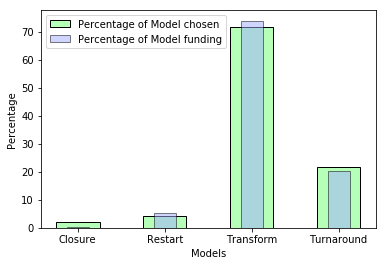

In [67]:
indicesmod = np.arange(len(modPerc))
indicesfund = np.arange(len(modFund))

plt.bar(indicesmod, modPerc, width=width, 
        color='#b5ffb9', edgecolor='black', label='Percentage of Model chosen')
plt.bar(indicesfund, modFund, 
        width=.25, color='#a3acff', alpha=0.5, edgecolor='black', label='Percentage of Model funding')

for i, v in enumerate(modFund):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

xlabel = ('Closure','Restart','Transform','Turnaround')
plt.xticks(indicesfund, xlabel)
plt.xlabel("Models")

plt.ylabel('Percentage')

plt.legend()
plt.show()

##Because Closure, on this graph, is so small-- I'm going to make it its own graph just for emphasis.

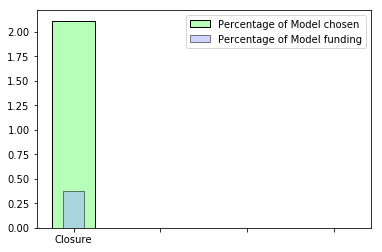

In [69]:
## Closure zoom in.

closlabel = ("Closure", "","","")

plt.bar(indicesmod, (closmodPerc,0,0,0), 
        width=width, color='#b5ffb9', edgecolor='black', label='Percentage of Model chosen')

plt.bar(indicesfund, (closPerc,0,0,0), 
        width=.25, color='#a3acff', alpha=0.5, edgecolor='black', label='Percentage of Model funding')

plt.xticks(indicesmod, ("Closure",""))

plt.legend()
plt.show()